# Know Your AI: Developing a Framework to Address Bias in Facial Expression Recognition 

## PART 1: Image Processing for Convolutional Neural Network (CNN) Modeling 

To run a convolutional neural network (CNN) model to detect facial expressions, I needed do a considerable amount of image pre-processing. CNN models require that all the images in a dataset need to be the same dimensions and either RGB or grayscale. In this project, I chose to make all the images be 75 by 110 pixels since I needed the images to be rectangular to capture the shape of a face, and there were other images in my dataset that were 75 by 100. I could have chosen another rectangular dimension size, but since most of the other cropped images were about that size, I decided to choose these dimensions figures. Secondly, I made all my images grayscale since there was already a considerable amount of images in my dataset that were already grayscale. As part of my dataset, I used pre-existing facial expression datasets that were already cropped to fit a face (although not all were 75 by 110) and they were grayscale. 

For the images that were already pre-processed, some of them still needed to be configured to the correct dimensions. For the rest of the images that were not pre-processed or part of a facial expression dataset, I needed to detect faces in the images, crop them to my specified dimension, and convert them to grayscale. For all images, I also needed to convert them to numpy arrays since CNN models can only be processed using the numpy arrays of images. I will explain more about how CNN models work in Part 2 of this notebook ("2_CNN_Modeling").

**At the end of this notebook, the image data will be saved as numpy arrays to a csv file. In my second notebook, 2_CNN_Modeling, I will read the csv files I created in this notebook to run my models.**

![image crop demo](./images/display_images/image-resize-demo.png/)

**Notes:** 
  - Some of the image databases that I used in this project do not permit me to share their image files. Therefore, you won't be able to run this notebook using my image dataset. You can, however, run this notebook on images that you're using. If you are also working with images of faces, you can run the entire notebook on your dataset and make changes where necessary. If you are not working with images of faces, you can skip the [detect face and crop](#Detect-Face-and-Crop) section and move on to the next step. 
  - Image credits are given where necessary.
  - To view the image sources I used to compile my dataset, see the README in this repository! 
  - You can run my second notebook (2_CNN_Modeling) and use my image csv file to run my CNN models. 

### CONTENTS
- [**Import Libraries**](#Import-Libraries)
- [**Image Preprocessing**](#Image-Pre-Processing)
 - [Detect Face and Crop](#Detect-Face-and-Crop)
 - [Resize images to 75 (width) by 110 (height) pixels](#Resize-images-to-75-(width)-by-110-(height)-pixels)
 - [Convert images to grayscale and numpy array](#Convert-images-to-grayscale-and-numpy-array)
 - [Combine image labels (rasas/emotions) into one array](#Combine-image-labels-(rasas/emotions)-into-one-array)
 - [Visualize images distribution per rasa (emotion)](#Visualize-images-distribution-per-rasa-(emotion))
 - [Preview images per rasa](#Preview-images-per-rasa)
- [**Preview predictor and target variables**](#Preview-predictor-and-target-variables)
 - [Predictor array (all image pixels)](#Predictor-array-(all-image-pixels))
 - [Target array (nine emotions)](#Target-array-(nine-emotions))
- [**Save image data to csv**](#Save-image-data-to-csv)
- [**Conclusions and Next Steps**](#Conclusions-and-Next-Steps)

# Import Libraries

In [1]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Image-specific libraries 
from PIL import Image
from keras.preprocessing import image

np.random.seed(2019)

%matplotlib inline

Using TensorFlow backend.


# Image Pre-Processing

The goal of image pre-processing is to end up with images of the same dimension and color scheme, convert them all to numpy arrays, and save this data to a csv file. 

## Detect Face and Crop

Run the following code in terminal to detect faces and crop them from unedited photos. The code will locate your images directory, run through every image, detect a face and crop it, and place the cropped images in a specified folder. For any faces that aren't detected, those images will be placed in a separate specified folder. At the end of this process, there should be no images left in your original folder. Always make an extra copy of your original images as a backup. Source and more details on how to run this code: https://pypi.org/project/autocrop/

`autocrop -i /images_directory -o /images_directory/crop  -r /images_directory/nofaces  -w 75 -H 110 --facePercent 70 --padUp 70 --padDown 70`

## Resize images to 75 (width) by 110 (height) pixels

For any images that were already cropped and/or not detected using the code above, this code will resize the images to my specified dimensions. 

In [2]:
# Function to resize images 
def resize_images(images_directory):
    for i, image in enumerate(os.listdir(images_directory)):
        if image != '.DS_Store': # Passes a hidden file called ".DS_Store"
            image_dir = images_directory + '/' + image
            img = Image.open(image_dir)
            width, height = img.size # Stores image height and width as variables
           
            # Check if image is 75 x 110
            if (width == 75) & (height == 110): # If images meet hxw requirement, pass
                None
            elif (width != 75) or (height != 110):
                img = img.resize((75,110)) # Reshape images that are not 75 x 110 
                img.save(image_dir, optimize=True) # Save image
    
    print(f'Your images have been scaled to 75x100!')       
# resize images: https://stackoverflow.com/questions/37631611/python-how-to-resize-an-image-using-pil-module

In [3]:
# Run the function on my images folders 
rasa_list = ['adbhuta', 'bibhatsa', 'bhayanaka', 'hasya', 'karuna', 'roudra', 'santa', 'srngara', 'veera'] 

for rasa in rasa_list:
    rasa_directory = './rasa_images/' + rasa
    resize_images(rasa_directory)

Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!
Your images have been scaled to 75x100!


## Convert images to grayscale and numpy array

This function will find my images in my directory and convert any colored images to grayscale, and it will convert all images to numpy arrays.

In [4]:
# Function to convert images to grayscale and numpy array
def get_array(rasa, images_directory):
    array_list = []
    for image in os.listdir(images_directory):
        if image != '.DS_Store': # Passes a hidden file called ".DS_Store"
            image_dir = images_directory + '/' + image
            img = Image.open(image_dir).convert('L') # Converts image to grayscale
            img.save(image_dir, optimize=True)   
         
    for image in os.listdir(images_directory):                
        if image.endswith(".jpg"):                             
            image_dir = images_directory + '/' + image    
            img = Image.open(image_dir)
            pix = np.array(img) # Converts image to numpy array
            array_list.append(pix)     
    print(f'{str(rasa)} shape: {np.stack(array_list).shape}')
    return np.stack(array_list) 

In [5]:
# Run function on all emotions.
adbhuta = get_array('adbhuta', './rasa_images/adbhuta')

bibhatsa = get_array('bibhatsa', './rasa_images/bibhatsa')

bhayanaka = get_array('bhayanaka', './rasa_images/bhayanaka')

hasya = get_array('hasya', './rasa_images/hasya')

karuna = get_array('karuna', './rasa_images/karuna')

roudra = get_array('roudra', './rasa_images/roudra')

santa = get_array('santa', './rasa_images/santa')

srngara = get_array('srngara', './rasa_images/srngara')

veera = get_array('veera', './rasa_images/veera')

adbhuta shape: (115, 110, 75)
bibhatsa shape: (112, 110, 75)
bhayanaka shape: (112, 110, 75)
hasya shape: (133, 110, 75)
karuna shape: (109, 110, 75)
roudra shape: (110, 110, 75)
santa shape: (111, 110, 75)
srngara shape: (121, 110, 75)
veera shape: (112, 110, 75)


## Combine image labels (rasas/emotions) into one array

Now that I've converted my images to numpy arrays, I need to assign the correct rasa (emotion) label to each image. This way I'll be able to keep track of what emotion an image is classified as. 

In [6]:
# Create variable for all rasa (emotions) arrays
rasa_arrays = adbhuta, bibhatsa, bhayanaka, hasya, karuna, roudra, santa, srngara, veera

In [7]:
# Function to create labels array 
def map_emotions(emotions):
    lst = []
    for index, emotion in enumerate(emotions):
        for i in range(len(emotion)):
            lst.append(index) # Appends the same number to a list for each mention of a rasa
    
    stacked_array = np.stack(lst) # Creates one array with all image labels (numbers 0 - 8)
    print(f'There are {stacked_array.shape} images in this dataset!')
    return stacked_array

In [8]:
# Call function 
rasa_labels = map_emotions(rasa_arrays)
print("-"*40)
print(f'`rasa_labels` looks like this: {rasa_labels}')

There are (1035,) images in this dataset!
----------------------------------------
`rasa_labels` looks like this: [0 0 0 ... 8 8 8]


## Visualize images distribution per rasa (emotion)

Here, I do some exploratory data analysis to check if my image classes are balanced (meaning that I have about an equal distribution of images per rasa).

In [9]:
# Convert array to DataFrame
rasa_labels_df = pd.DataFrame(rasa_labels, columns = ['rasas_labels'])

# Create named labels dictionary
rasas_dict = {0: 'adbhuta (astonishment)', 
              1: 'bibhatsa (disgust)', 
              2: 'bhayanaka (fear)', 
              3: 'hasya (joy)', 
              4: 'karuna (sorrow)', 
              5: 'roudra (anger)', 
              6: 'santa (peace)', 
              7: 'srngara (love)', 
              8: 'veera (confidence)'}

# Map rasas_dict to turn numbers to their rasa strings
rasa_labels_df['rasas_labels'] = rasa_labels_df['rasas_labels'].map(rasas_dict)

In [10]:
# Preview head
rasa_labels_df.head()

,rasas_labels
0,adbhuta (astonishment)
1,adbhuta (astonishment)
2,adbhuta (astonishment)
3,adbhuta (astonishment)
4,adbhuta (astonishment)


In [11]:
# Function to make bar plot
def bar_plot(x, y, title, color, filename):    
    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)
    plt.savefig(f'./images/dataviz/{filename}.png', bbox_inches = 'tight')

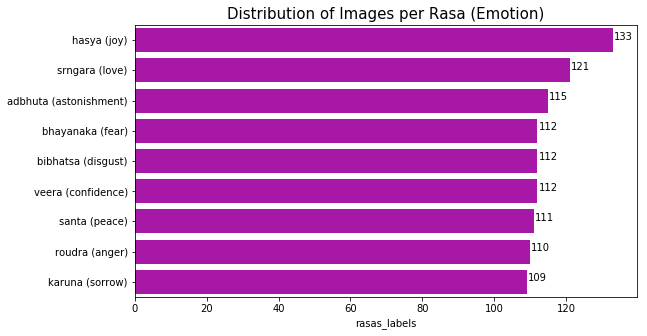

In [12]:
# Visualize position distribution
bar_plot(rasa_labels_df['rasas_labels'].value_counts(), 
         rasa_labels_df['rasas_labels'].value_counts().index, 
         "Distribution of Images per Rasa (Emotion)", 'm', 'image_dataset_distribution')

The distribution of images per rasa is pretty balanced, with only one rasa (hasya (joy)) containing a little more images than the rest of the classes. 

## Preview images per rasa

I want to make sure that all my pixels were processed correctly and that my labels are correct. So in this section I visualize a sampling of facial expressions for each of the nine rasas. 

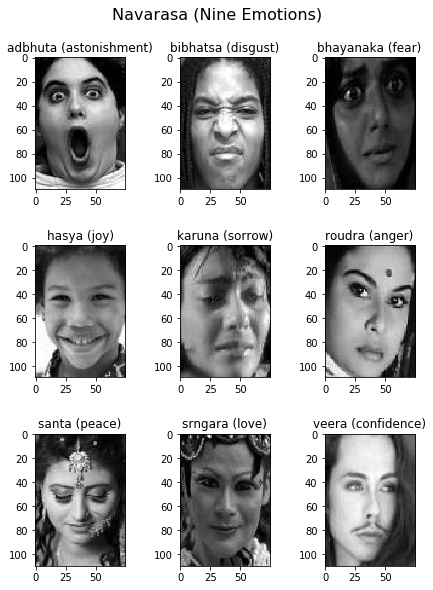

In [13]:
# Plot images
fig, axes = plt.subplots(3, 3, figsize=(6, 8))
ax = axes.ravel()
plt.suptitle('Navarasa (Nine Emotions)', y=1.03, size=16)

ax[0].imshow(adbhuta[53], cmap=plt.cm.gray)
ax[0].set_title("adbhuta (astonishment)")
ax[1].imshow(bibhatsa[54], cmap=plt.cm.gray)
ax[1].set_title("bibhatsa (disgust)")
ax[2].imshow(bhayanaka[57], cmap=plt.cm.gray)
ax[2].set_title("bhayanaka (fear)")
ax[3].imshow(hasya[1], cmap=plt.cm.gray)
ax[3].set_title("hasya (joy)")
ax[4].imshow(karuna[2], cmap=plt.cm.gray)
ax[4].set_title("karuna (sorrow)")
ax[5].imshow(roudra[1], cmap=plt.cm.gray)
ax[5].set_title("roudra (anger)")
ax[6].imshow(santa[10], cmap=plt.cm.gray)
ax[6].set_title("santa (peace)")
ax[7].imshow(srngara[101], cmap=plt.cm.gray)
ax[7].set_title("srngara (love)")
ax[8].imshow(veera[5], cmap=plt.cm.gray)
ax[8].set_title("veera (confidence)")

fig.tight_layout()
plt.show()
fig.savefig(f'./images/dataviz/navarasa_preview_dataset.png', bbox_inches = 'tight')

[Image source for "srngara" face](https://www.flickr.com/photos/tjook/4746803656/in/photolist-9XdG49-vcFh7S-62Lxcp-pZWg1t-ain93R-4pF4Tj-qVmc3t-nAdLsE-6AvFTU-eEBsvZ-oeP8XZ-8VQ7Mk-nSHdPx-Ji7CH-nQkN6k-8esBmm-bnJ5Xz-N3Wfum-WKbD95-q1eDgh-e7wfGD-iGsRxx-aHcyre-rBfkRk-az6phv-avEQh5-aipWsh-dNyWsX-XtizkB-jbhRuk-9rgG3b-nZ9ti4-YoYm6E-31Dnp-p4jisb-qouL-9JdMW-4pSazz-8NpcSZ-pHLuGS-8moqdb-dQGBn4-4BZ2ib-p4jivC-21X7AXj-9goFCZ-95nxEX-bo1c8t-bCumKj-q1eRpW)

<img src="./images/display_images/navarasas-art_.png" width="500" style="float: left">

# Preview predictor and target variables

In this section, I want to get a sense of what my predictor (`X`) and target (`y`) variables will look like. Since I'm using images to predict facial expression, my `X` variables are the numpy arrays, and my `y` variables are the rasa (emotions). 

## Predictor array (all image pixels)

In [14]:
# Concatenate all 9 individual emotion arrays into one array 
X = np.concatenate((rasa_arrays))
print(f'Shape of X: {X.shape}')
print("-"*40)
print(f'Number of images in my dataset: {X.shape[0]}')
print("-"*40)
print("Dimensions of all images:", X[0].shape)

Shape of X: (1035, 110, 75)
----------------------------------------
Number of images in my dataset: 1035
----------------------------------------
Dimensions of all images: (110, 75)


## Target array (nine emotions)

In [15]:
# Set y variable, emotion labels that correspond to the images
y = rasa_labels

# Count of labels 
print(f'Number of image labels: {len(y)}')

Number of image labels: 1035


# Save image data to csv

Now I have to prep my arrays to save them a csv file. Each row in a csv file should correspond to an image. The columns will hold the pixel values, and the `y` column will hold the rasa (emotion) label.

In [16]:
# Get pixel width for flattened image
pixels_flat = X.shape[1] * X.shape[2]
print(f'The pixel width, when flattened, is: {pixels_flat}')

The pixel width, when flattened, is: 8250


In [17]:
# Save image pixels to DataFrame, one row represents one image
image_pixels_df = pd.DataFrame(X.reshape(len(y), pixels_flat))

# Add labels column
image_pixels_df['rasa_num_labels'] = y

In [18]:
# Map rasas to numeric values 
image_pixels_df['rasas_string_labels'] = image_pixels_df['rasa_num_labels'].map(rasas_dict)

In [19]:
# Preview head
image_pixels_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,8242,8243,8244,8245,8246,8247,8248,8249,rasa_num_labels,rasas_string_labels
0,65,64,63,64,66,67,66,64,59,67,...,255,252,255,250,255,255,255,255,0,adbhuta (astonishment)
1,0,6,3,0,7,9,5,7,7,2,...,255,255,244,242,255,249,248,105,0,adbhuta (astonishment)
2,44,23,6,5,4,0,0,4,0,0,...,226,232,210,214,240,236,251,163,0,adbhuta (astonishment)


In [20]:
# Preview tail
image_pixels_df.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,8242,8243,8244,8245,8246,8247,8248,8249,rasa_num_labels,rasas_string_labels
1032,36,36,36,36,36,36,36,36,37,37,...,247,212,36,35,22,16,19,22,8,veera (confidence)
1033,236,236,236,236,236,236,236,236,241,236,...,107,98,90,93,103,143,147,152,8,veera (confidence)
1034,37,39,39,37,40,47,55,59,52,59,...,236,236,236,236,236,234,234,234,8,veera (confidence)


In [21]:
# Save image data to csv
image_pixels_df.to_csv('./data/image_pixels.csv')

# Conclusions and Next Steps

Now that my images are saved into a csv, I can begin pre-processing my data for CNN modeling in my next notebook, 2_CNN_Modeling. Gathering my images and prepping them for use was a time consuming step of my project. First, I had to hand-select images to place in my dataset, and not only that, I had to find facial expressions that fit into each of the nine categories. The reason why I hand-selected my images is because I wanted to create a diverse and inclusive dataset that depicts people of color, young and old people, and gender non-conforming people. Secondly, there were times when my autodetect-face-and-crop code did not detect faces on images, so for those I had to manually crop the faces out of the images. 

Another significant thing I learned later on during the modeling phase of my project is that image size and color matters. I chose 75x110 as my image dimensions because there was an existing opensource facial expression dataset with images that were predominately that size. Additionally, there was another open source image dataset that contained only grayscale images. So given the resources available to me, I had to modify all my images accordingly. That being said, there exists widely-used pre-trained convolutional neural networks with pre-existing image specifications. If I had looked into this ahead of time, I would have tried harder to acquire RGB images so that they could run better through these pre-trained models. I was able to get my dataset to run through the `VGG6` pre-trained network, but the results weren't so great. To improve my results on that model and overall, as a major next step I would try to refine my image dataset and get more samples. 